In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(nx.__version__)

2.4


In [32]:
XG=nx.DiGraph()# graph, nodes, and edges can all have attributes
#add weighted edges
XG.add_weighted_edges_from([('s', 'u', 10), ('s', 'x', 5),
                                         ('u', 'v', 1), ('u', 'x', 2),
                                         ('v', 'y', 1), ('x', 'u', 3),
                                         ('x', 'v', 5), ('x', 'y', 2),
                                         ('y', 's', 7), ('y', 'v', 6)])
#add edge with extra attributes
XG.add_edge(1, 2, color='red', weight=0.84, size=300, eps=10)
print("node 1 before adding property ",XG.nodes[1])
#it seems nodes attribute can be added after node's created
XG.add_nodes_from([(1, dict(size=11,loc=np.array([0,0,0],dtype='float32'))), 
                   (2, {'color':'blue','loc':np.array([0,0,1],dtype='float64')})])

# XG.add_nodes_from([(1, dict(size=11,loc=np.array([1,2,3]))), (2, dict(color='blue',loc=np.array([3,2,3])))])

print("node 1 after adding property ",XG.nodes[1])
# XG.add_node(1,size=11,loc=np.array([1,2,3],dtype='float64'))
# XG.add_node(2,color='blue',loc=np.array([3,2,3],dtype='float64'))
                   
XG.add_node(3,eps=100,loc=np.array([0,1,0],dtype='float64'))
# XG.add_nodes_from([(4, dict(size=11, eps=4,loc=np.array([2,2,2]))), (5, {'color':'blue',loc=np.array([1,1,3])})])

XG.add_node(4,size=11, eps=4,loc=np.array([0,1,1],dtype='float64'))
XG.add_node(5,color='blue',loc=np.array([1,1,1],dtype='float64'))

XG.add_edge(4, 5)
# XG.add_nodes_from([(4, dict(eps=0)),5,6])

node 1 before adding property  {}
node 1 after adding property  {'size': 11, 'loc': array([0., 0., 0.], dtype=float32)}


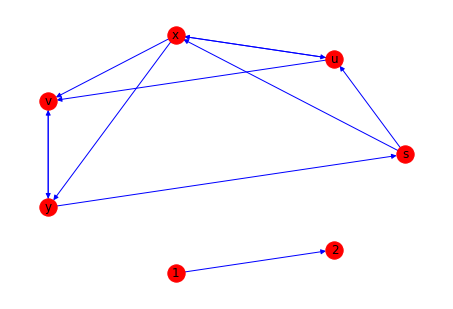

In [49]:
#graphical view
nx.draw(XG, pos=nx.circular_layout(XG), with_labels=True, node_color='r', edge_color='b')

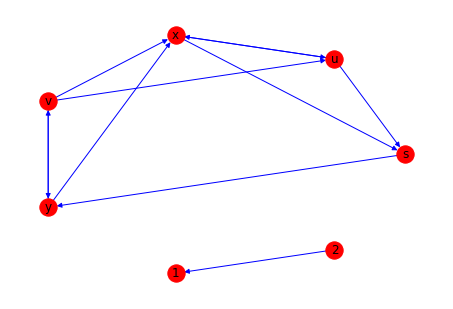

In [50]:
#graphical view
#reverse graph
RG=XG.reverse()#copy of the reverse graph
nx.draw(RG, pos=nx.circular_layout(RG), with_labels=True, node_color='r', edge_color='b')

In [35]:
dict(XG.nodes(data='loc'))

{1: array([0., 0., 0.], dtype=float32),
 2: array([0., 0., 1.]),
 3: array([0., 1., 0.]),
 4: array([0., 1., 1.]),
 5: array([1., 1., 1.]),
 's': None,
 'u': None,
 'v': None,
 'x': None,
 'y': None}

IndexError: too many indices for array

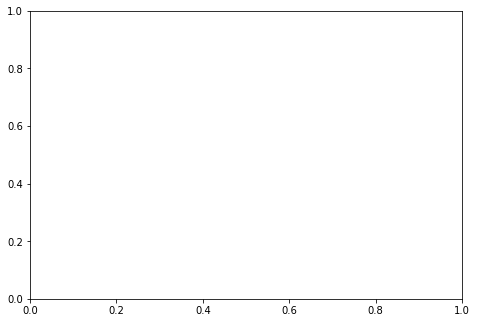

In [36]:
#nx can't draw 3d
nx.draw(XG, pos=dict(XG.nodes(data='loc')), with_labels=True, node_color='r', edge_color='b')

In [37]:
# access nodes' attribute
print("node 3's eps attribute: ", XG.nodes[3]['eps'])
print("node 4's eps attribute: ", XG.nodes[4]['eps'])

node 3's eps attribute:  100
node 4's eps attribute:  4


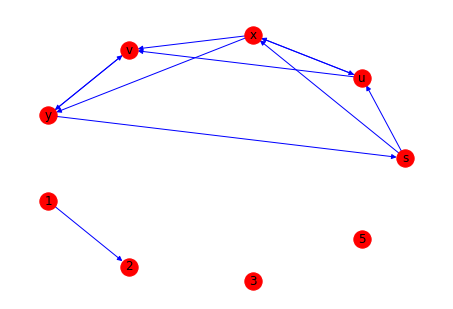

In [38]:
# remove nodes, seems like related edges are removed as well
XG.remove_node(4)
nx.draw(XG, pos=nx.circular_layout(XG), with_labels=True, node_color='r', edge_color='b')

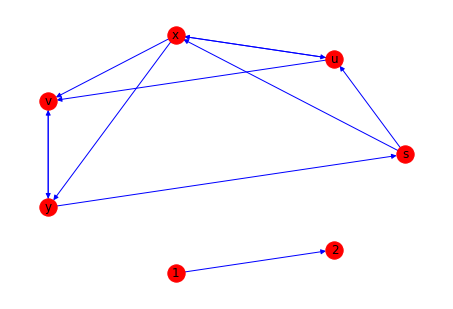

In [39]:
XG.remove_nodes_from([3,5])
nx.draw(XG, pos=nx.circular_layout(XG), with_labels=True, node_color='r', edge_color='b')

In [15]:
#layout function gives a dict from node name to 
nx.spring_layout(XG)

{1: array([0.42371673, 1.        ]), 2: array([-0.42371673, -1.        ])}

In [40]:
dict(XG.nodes(data='eps'))
#use this to replace nx.spring_layout to draw the graph differently

{1: None, 2: None, 's': None, 'u': None, 'v': None, 'x': None, 'y': None}

In [41]:
print("shortest path from s to u is ",nx.shortest_path(XG, 's', 'u'))
print("shortest path from s to v is ",nx.shortest_path(XG, 's', 'v'))

shortest path from s to u is  ['s', 'u']
shortest path from s to v is  ['s', 'u', 'v']


In [42]:
# to draw 3d, only numbered nodes are allowed

from mayavi import mlab

# some graphs to try
# H=nx.krackhardt_kite_graph()
# H=nx.Graph();H.add_edge('a','b');H.add_edge('a','c');H.add_edge('a','d')
# H=nx.grid_2d_graph(4,5)
H = nx.cycle_graph(20)

# reorder nodes from 0,len(G)-1
G = nx.convert_node_labels_to_integers(H)
# 3d spring layout
# pos = nx.spring_layout(XG, dim=3)
pos=dict(XG.nodes(data='loc'))

# numpy array of x,y,z positions in sorted node order
xyz = np.array([pos[v] for v in sorted(XG)])#/1
# scalar colors
scalars = np.array(list(XG.nodes())) + 5

pts = mlab.points3d(
    xyz[:, 0],
    xyz[:, 1],
    xyz[:, 2],
    scalars,
    scale_factor=.4,
    scale_mode="none",
    colormap="Blues",
    resolution=100,
)

pts.mlab_source.dataset.lines = np.array(list(XG.edges()))
tube = mlab.pipeline.tube(pts, tube_radius=0.01)
mlab.pipeline.surface(tube, color=(0.8, 0.8, 0.8))
mlab.show()

TypeError: '<' not supported between instances of 'int' and 'str'

In [19]:
# np.array(list(XG.edges()))
pts.mlab_source.dataset.lines#an be stored in three different places:

SyntaxError: invalid syntax (<ipython-input-19-303742728bb6>, line 2)

In [43]:
# pos = nx.spring_layout(G, dim=4)
pos=dict(XG.nodes(data='loc'))

# numpy array of x,y,z positions in sorted node order
xyz = np.array([pos[v] for v in sorted(XG)])

TypeError: '<' not supported between instances of 'int' and 'str'

In [37]:
dict(XG.nodes(data='loc'))[1].dtype

dtype('float64')

In [8]:
xyz

array([[1, 2, 3],
       [3, 2, 3],
       [6, 2, 3],
       [2, 2, 2],
       [1, 1, 3]])

In [17]:
pos[1]

array([0.11780747, 0.26439407, 1.        ])

In [10]:
sorted(XG)

[1, 2, 3, 4, 5]

## access/reporting nodes edges and neighbors

In [44]:
#get neighbors of a node
#possible multiple neighbors in general
next(nx.neighbors(XG,1))

2

In [30]:
#to get the next neighbor
# iter=XG.neighbors(1)
# next(iter)
next(XG.neighbors(1))

2

In [45]:
# for edges
# access an edge
# G[u][v] returns the edge attribute dictionary.
print("edge su is ",XG['s']['u'])
print("edge su is ",XG.edges['s','u'])#another way to access edges
print("edge 1,2 has edge attribute: ",XG[1][2])
#same as following, which returns attribute dictionary of an edge
print("edge 1,2 has edge attribute: ",XG.get_edge_data(1,2))
# access one of such attribute
print("edge 1,2 eps is: ", XG[1][2]['eps'])


edge su is  {'weight': 10}
edge su is  {'weight': 10}
edge 1,2 has edge attribute:  {'color': 'red', 'weight': 0.84, 'size': 300, 'eps': 10}
edge 1,2 has edge attribute:  {'color': 'red', 'weight': 0.84, 'size': 300, 'eps': 10}
edge 1,2 eps is:  10


In [47]:
#for nodes
# access a node
print("node s is connected to", XG['s'])

#print adjacjency list
print("graph adjacency list: ",XG.adj)

# add attribute to node?
XG.nodes['s']['eps']=100.00
# XG['s']['eps']=100.00#this doesn't work
print("node s is connected to", XG['s'])

node s is connected to {'u': {'weight': 10}, 'x': {'weight': 5}}
graph adjacency list:  {'s': {'u': {'weight': 10}, 'x': {'weight': 5}}, 'u': {'v': {'weight': 1}, 'x': {'weight': 2}}, 'x': {'u': {'weight': 3}, 'v': {'weight': 5}, 'y': {'weight': 2}}, 'v': {'y': {'weight': 1}}, 'y': {'s': {'weight': 7}, 'v': {'weight': 6}}, 1: {2: {'color': 'red', 'weight': 0.84, 'size': 300, 'eps': 10}}, 2: {}}
node s is connected to {'u': {'weight': 10}, 'x': {'weight': 5}}


In [17]:
# use dijkstra to update from a source?
(D,P)=nx.single_source_dijkstra(XG, 's')
print("D: ",D)
print("P: ",P)

D:  {'s': 0, 'x': 5, 'y': 7, 'u': 8, 'v': 9}
P:  {'s': ['s'], 'u': ['s', 'x', 'u'], 'x': ['s', 'x'], 'v': ['s', 'x', 'u', 'v'], 'y': ['s', 'x', 'y']}


In [15]:
D

{'s': 0, 'u': 8, 'v': 9, 'x': 5, 'y': 7}

In [16]:
P

{'s': ['s'],
 'u': ['s', 'x', 'u'],
 'v': ['s', 'x', 'u', 'v'],
 'x': ['s', 'x'],
 'y': ['s', 'x', 'y']}

In [111]:
iter_=XG.neighbors('s')
print(iter_)
while True:
    try:
        print("s's neighbours are ",next(iter_))
    except (StopIteration,Exception) as e:
        print(e)
        break
            

s's neighbours are  u
s's neighbours are  x



In [122]:
# iterate over edges
for e in list(XG.edges):
    print("edge: ",e, "value: ", e.va)
# iterate over nodes
for n in list(XG.nodes):
    print("node: ",n)

AttributeError: 'tuple' object has no attribute 'va'

In [100]:
#returns attribute dictionary of an edge
XG.get_edge_data(1,2)
#same as
XG[1][2]

{'color': 'red', 'eps': 10, 'size': 300, 'weight': 0.84}

{'color': 'red', 'eps': 10, 'size': 300, 'weight': 0.84}

## Convert to numpy array

In [96]:
nx.to_numpy_array(XG)

array([[  0.  ,  10.  ,   5.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   2.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   3.  ,   0.  ,   5.  ,   2.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  7.  ,   0.  ,   0.  ,   6.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.84,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   1.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ]])

In [97]:
nx.to_numpy_matrix(XG)

matrix([[  0.  ,  10.  ,   5.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   0.  ],
        [  0.  ,   0.  ,   2.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   0.  ],
        [  0.  ,   3.  ,   0.  ,   5.  ,   2.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   0.  ],
        [  0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   0.  ],
        [  7.  ,   0.  ,   0.  ,   6.  ,   0.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   0.  ],
        [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.84,   0.  ,
           0.  ,   0.  ],
        [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   0.  ],
        [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   0.  ],
        [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   1.  ],
        [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   0.  ]])

In [98]:
nx.to_dict_of_lists(XG)

{1: [2],
 2: [],
 3: [],
 4: [5],
 5: [],
 's': ['u', 'x'],
 'u': ['v', 'x'],
 'v': ['y'],
 'x': ['u', 'v', 'y'],
 'y': ['s', 'v']}

In [99]:
nx.to_dict_of_dicts(XG)

{1: {2: {'color': 'red', 'eps': 10, 'size': 300, 'weight': 0.84}},
 2: {},
 3: {},
 4: {5: {}},
 5: {},
 's': {'u': {'weight': 10}, 'x': {'weight': 5}},
 'u': {'v': {'weight': 1}, 'x': {'weight': 2}},
 'v': {'y': {'weight': 1}},
 'x': {'u': {'weight': 3}, 'v': {'weight': 5}, 'y': {'weight': 2}},
 'y': {'s': {'weight': 7}, 'v': {'weight': 6}}}

In [129]:
XG.nodes[1]['eps']

99

In [121]:
# node 1 doesn't have eps yet so declaring it now
# one can acccess node attribute that doesn't exist yet
XG.nodes[1]['eps']=99
XG.nodes[1]['eps']

99

In [119]:
XG.nodes[3]['eps']

100

In [114]:
# access a list of certain attributes
list(XG.nodes(data='eps'))

[('s', None),
 ('u', None),
 ('x', None),
 ('v', None),
 ('y', None),
 (1, None),
 (2, None),
 (3, 100),
 (4, 4),
 (5, None)]

In [ ]:
# in the lqr case
# want to be able to store connectivity, i.e. which node a node leads to
# yet for each node